In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [60]:
d = pd.read_csv('dirty_data.csv')
d.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Chequeo de valores nulos en las columnas

In [23]:
d.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

Chequeo que esté bien calculado el valor total de la compra luego de cargos de envío y aplicación de descuentos

In [55]:
x1 = (d['order_price'][0] + d['delivery_charges'][0])*(1-(d['coupon_discount'][0]/100))
x1

11051.901

In [61]:
lis = []    #Aca guardaré los valores de 'order_total' bien calculados

for i in range(0,len(d['order_price'])):
    if d['coupon_discount'][i]!=0:
        price = (d['order_price'][i] + d['delivery_charges'][i])*(1-(d['coupon_discount'][i]/100))
        final_price = np.round(price,2)
        lis.append(final_price)
    
    else:
        price = d['order_price'][i] + d['delivery_charges'][i]
        final_price = np.round(price,2)
        lis.append(final_price)
        
print(f'Itmems in list: {len(lis)}')    #Chequeo que no me haya faltado ninguna fila
d['order_total'] = pd.Series(lis)       #Convierto la lista en una serie para luego incorporar los valores a la columna


Itmems in list: 500


Conteo de almacenes

In [30]:
warehouses = d['nearest_warehouse'].unique()
warehouses

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

Le cambio la inicial por mayúscula a los que iniciaban con minúscula

In [137]:
d['nearest_warehouse'] = d['nearest_warehouse'].str.capitalize()

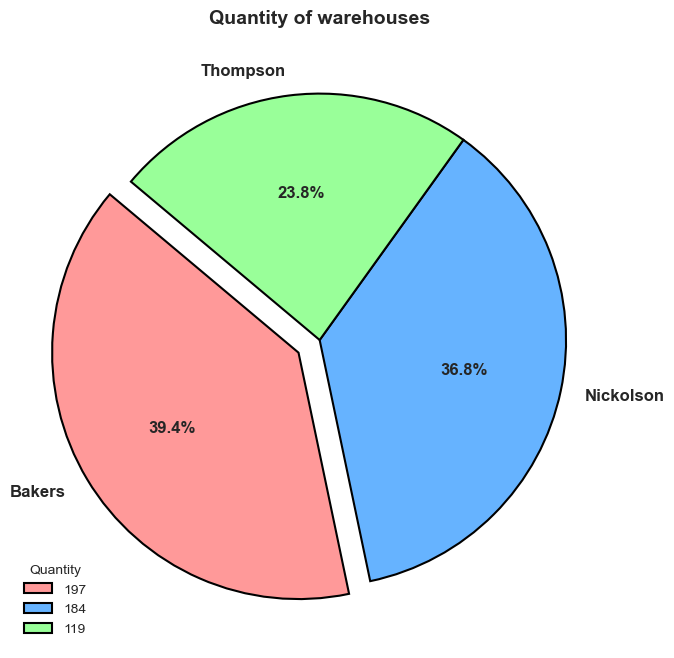

In [135]:
plt.figure(figsize=(8, 8))

c_warehouses = d['nearest_warehouse'].value_counts()
labels = ['Bakers', 'Nickolson', 'Thompson']
colors = ['#FF9999', '#66B3FF', '#99FF99']
explode = [0.1 if v == max(c_warehouses) else 0 for v in c_warehouses]        #Destaca la parte más grande

# wedge = cada porción del gráfico
# texts = lista con los etiquetas
# autotexts = lista con los porcentajes dentro de cada porción

wedges, texts, autotexts = plt.pie(
    c_warehouses, labels=labels, autopct="%0.1f%%", colors=colors, explode=explode,
    startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title('Quantity of warehouses', fontsize=14, fontweight='bold')
plt.legend(c_warehouses, loc='lower left', title='Quantity')
plt.show()

Total vendido por cada warehouse y cuanto representa del total vendido por la marca

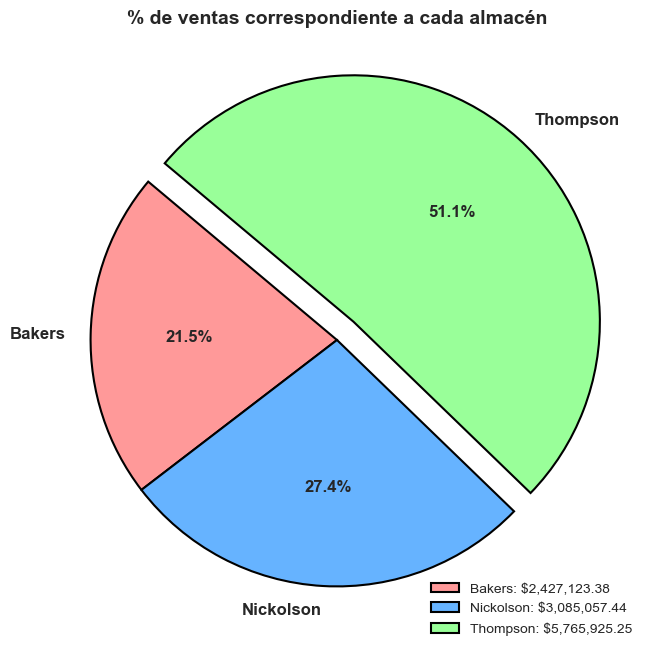

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")      

total = d.groupby('nearest_warehouse')['order_total'].sum()
explode = [0.1 if v == max(total) else 0 for v in total]        #Destaca la parte más grande
labels = ['Bakers', 'Nickolson', 'Thompson']
colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(8, 8))

# wedge = cada porción del gráfico
# texts = lista con los etiquetas
# autotexts = lista con los porcentajes dentro de cada porción

wedges, texts, autotexts = plt.pie(
    total, labels=labels, autopct="%0.1f%%", colors=colors, explode=explode,
    startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title('% de ventas correspondiente a cada almacén', fontsize=14, fontweight='bold')
plt.legend(
    labels=[f"{name}: ${value:,.2f}" for name, value in zip(labels, total)],
    loc=4, fontsize=10
)
plt.show()


In [95]:
print(f'Total vendido por almacen: {total}')

Total vendido por almacen: nearest_warehouse
Bakers       9465343.34
Nickolson    3738042.87
Thompson     6401449.88
Name: order_total, dtype: float64


¿Cuales fueron las 5 mayores ventas?

In [50]:
max5 = d['order_price'].nlargest(n=5)
max5

335    947691
237    865916
472    672832
70     655164
397    653959
Name: order_price, dtype: int64

¿Cuales fueron las 5 menores ventas?

In [51]:
min5 = d['order_price'].nsmallest(n=5)
min5

308     585
297     730
171    1010
192    1010
419    1010
Name: order_price, dtype: int64

Búsqueda de outliers

In [98]:
Q1_ot = d['order_total'].quantile(0.25)
Q3_ot = d['order_total'].quantile(0.75)
print(f'Lower Quartile is: {Q1_ot}') 
print(f'Upper Quartile is: {Q3_ot}')

median = d['order_total'].median()

IQR = Q3_ot-Q1_ot
print(f'Value of IQR_order_total is: {IQR}')

llimit = Q1_ot  - 1.5*IQR
ulimit = Q3_ot + 1.5*IQR

print(f'Lower limit of order_total is: {llimit}')
print(f'Upper limit of order_total is: {ulimit}')

d['outlier'] = ((d['order_total']<llimit) | (d['order_total']>ulimit))
out = d['outlier'].value_counts()
outliers = d[(d['order_total']<llimit) | (d['order_total']>ulimit)]     #Guardo los outliers en un df
out

Lower Quartile is: 6381.7875
Upper Quartile is: 17915.7725
Value of IQR_order_total is: 11533.984999999999
Lower limit of order_total is: -10919.189999999997
Upper limit of order_total is: 35216.75


outlier
False    482
True      18
Name: count, dtype: int64

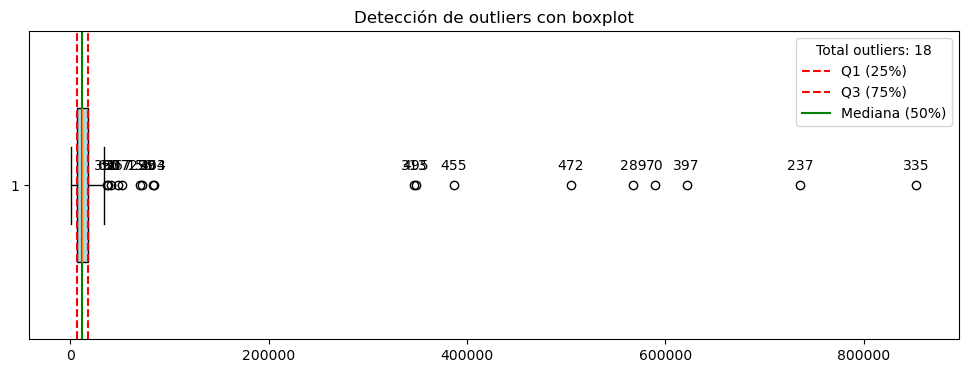

In [92]:
plt.figure(figsize=(12, 4))

plt.boxplot(d['order_total'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.axvline(Q1_ot, color='red', linestyle='dashed', label="Q1 (25%)")
plt.axvline(Q3_ot, color='red', linestyle='dashed', label="Q3 (75%)")
plt.axvline(median, color='green', linestyle='solid', label="Mediana (50%)")

for index, value in zip(outliers.index, outliers['order_total']):
    plt.text(value, 1.05, str(index), fontsize=10, color='black', ha='center')

plt.title('Detección de outliers con boxplot')
plt.legend(title=f"Total outliers: {len(outliers)}")
plt.show()

¿Cuantos clientes quedaron satisfechos con su compra?

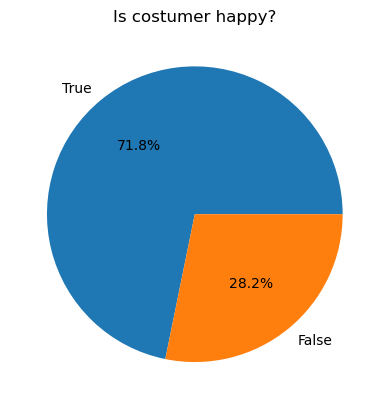

In [34]:
review = d['is_happy_customer'].value_counts()
plt.pie(review,
        labels=(['True','False']),
        autopct="%0.1f%%")
plt.title('Is costumer happy?')
plt.show()

¿Que porcentaje de clientes quedó satisfecho en cada almacen?

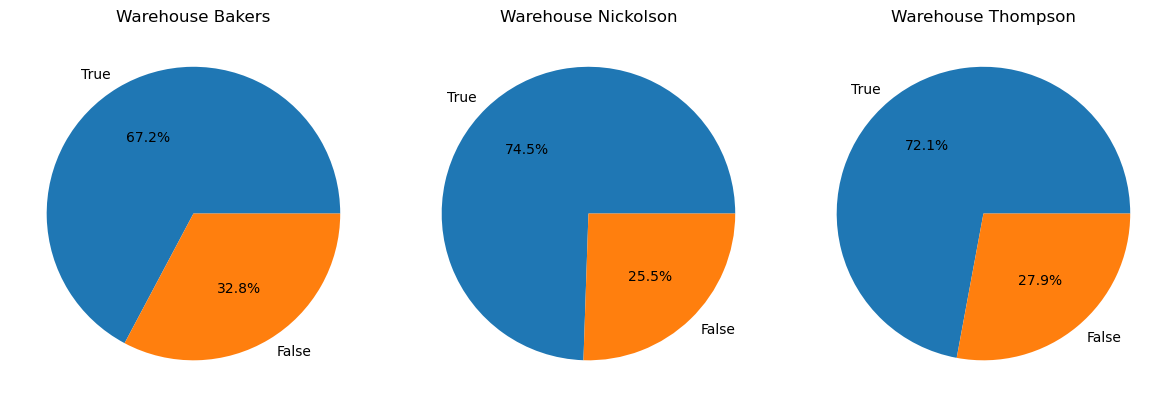

In [35]:
# Crea gráficos separados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

for ax, (warehouse, group) in zip(axes, d.groupby('nearest_warehouse')):
    count_review = group['is_happy_customer'].value_counts()
    
    ax.pie(count_review, labels=count_review.index, autopct="%0.1f%%")
    ax.set_title(f'Warehouse {warehouse}')
    
plt.tight_layout()
plt.show()